# Setup

In [25]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Normal Equation

### Generating linear-looking data for testing purposes

In [26]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

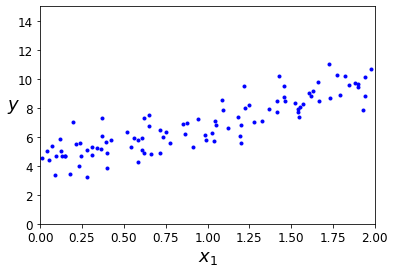

In [27]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### Computing $\theta$ using Normal Equation

In [28]:
X_b = np.c_[np.ones((100, 1)), X]          # adding x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [29]:
theta_best

array([[4.21509616],
       [2.77011339]])

### Making predictions using calculated $\theta$

In [30]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]    #adding x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

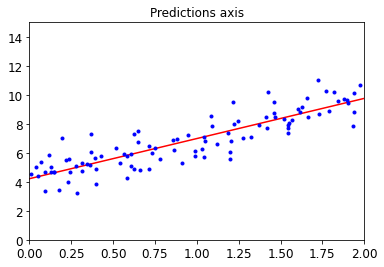

In [31]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.title("Predictions axis")
plt.show()

### Using Scikit-learn

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [33]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient Descent

In [34]:
eta = 0.1           #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)       #random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [35]:
theta

array([[4.21509616],
       [2.77011339]])

## Stochastic Gradient Descent

In [36]:
n_epochs = 50
t0, t1 = 5, 50      #learning schedule hyperparameters

In [37]:
def learning_schedule(t):
    return t0 / (t + t1)

In [38]:
theta = np.random.randn(2, 1)       #random initialization

In [45]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m+1)
        theta = theta - eta * gradients

In [46]:
theta

array([[4.23865474],
       [2.78775531]])

### Using Scikit-learn

In [59]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [60]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25737718]), array([2.81728536]))

## Polynomial Regression

#### Adding powers of each feature as new feature enable using linear model to fit nonlinear data

In [63]:
# generating non-linear and noisy data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

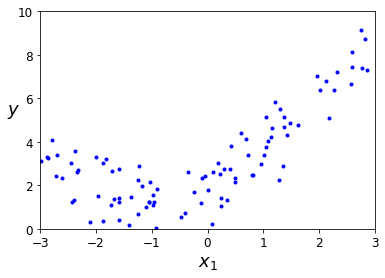

In [70]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [90]:
# adding squere of every feature to the set
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [91]:
X[0], X_poly[0]

(array([-2.34341757]), array([-2.34341757,  5.49160591]))

In [92]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.89486593]), array([[1.07677831, 0.51929544]]))

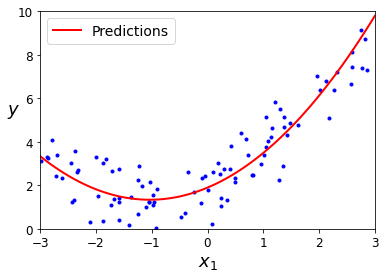

In [93]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()